In [1]:
import numpy as np
import cvxpy as cp
import matplotlib.pyplot as plt
%matplotlib inline

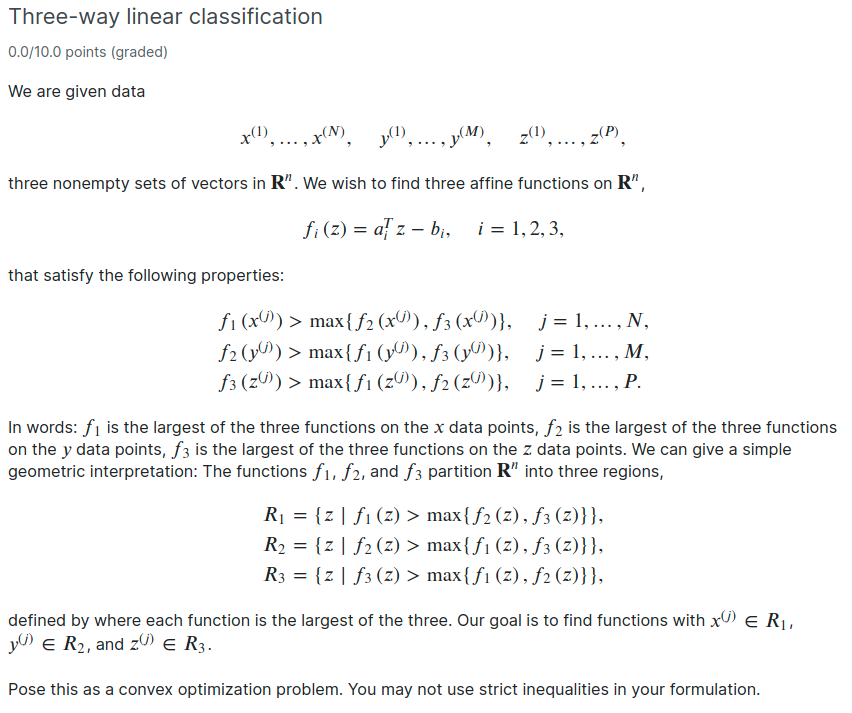

# Formulation

Inequalities are homogeneous in $a_i, b_i, i = 1,2,3$.

So, if it's feasible-equivalent to the LP:

find $a_i, b_i,\quad i = 1,2,3$  

$f_1(x) \geq f_2(x) + 1, \forall x \in X$  
$f_1(x) \geq f_3(x) + 1, \forall x \in X$  
$f_2(x) \geq f_1(y) + 1, \forall y \in Y$  
$f_2(x) \geq f_3(y) + 1, \forall y \in Y$  
$f_3(x) \geq f_1(z) + 1, \forall z \in Z$  
$f_3(x) \geq f_2(z) + 1, \forall z \in Z$  


# Problem data

In [2]:
X = [
[3.5674, 4.1253, 2.8535, 5.1892, 4.3273, 3.8133, 3.4117 
, 3.8636, 5.0668, 3.9044, 4.2944, 4.7143, 3.3082, 5.2540 
, 2.5590, 3.6001, 4.8156, 5.2902, 5.1908, 3.9802 ] ,
[ -2.9981, 0.5178, 2.1436,-0.0677, 0.3144, 1.3064, 3.9297 
, 0.2051, 0.1067,-1.4982,-2.4051, 2.9224, 1.5444,-2.8687 
, 1.0281, 1.2420, 1.2814, 1.2035,-2.1644,-0.2821]]

Y = [
[-4.5665,-3.6904,-3.2881,-1.6491,-5.4731,-3.6170,-1.1876 
,-1.0539,-1.3915,-2.0312,-1.9999,-0.2480,-1.3149,-0.8305 
,-1.9355,-1.0898,-2.6040,-4.3602,-1.8105, 0.3096] , 
[2.4117, 4.2642, 2.8460, 0.5250, 1.9053, 2.9831, 4.7079 
, 0.9702, 0.3854, 1.9228, 1.4914,-0.9984, 3.4330, 2.9246 
, 3.0833, 1.5910, 1.5266, 1.6256, 2.5037, 1.4384]]

Z = [
[1.7451, 2.6345, 0.5937,-2.8217, 3.0304, 1.0917,-1.7793 
, 1.2422, 2.1873,-2.3008,-3.3258, 2.7617, 0.9166, 0.0601 
,-2.6520,-3.3205, 4.1229,-3.4085,-3.1594,-0.7311] , 
[-3.2010,-4.9921,-3.7621,-4.7420,-4.1315,-3.9120,-4.5596 
,-4.9499,-3.4310,-4.2656,-6.2023,-4.5186,-3.7659,-5.0039 
,-4.3744,-5.0559,-3.9443,-4.0412,-5.3493,-3.0465]]

X = np.array(X)
Y = np.array(Y)
Z = np.array(Z)
X.shape, Y.shape, Z.shape

((2, 20), (2, 20), (2, 20))

# Solving

In [3]:
l = ['x', 'y', 'z']
a = dict(); b = dict()
P = {}
P['x'] = X; P['y'] = Y; P['z'] = Z;

for v in l:
    a[v] = cp.Variable((2,1), name = f'a_{v}')
    b[v] = cp.Variable((1,1), name = f'b_{v}')
    
C = []

for v1 in l:
    for v2 in l:
        if(v2 == v1): continue
        ineq = P[v1].T @ a[v1] + b[v1] >= P[v1].T @ a[v2] + b[v2] + 1
        C.append(ineq)
        
obj = cp.Minimize(0)
prob = cp.Problem(obj, C)
prob.solve()
assert prob.status == cp.OPTIMAL

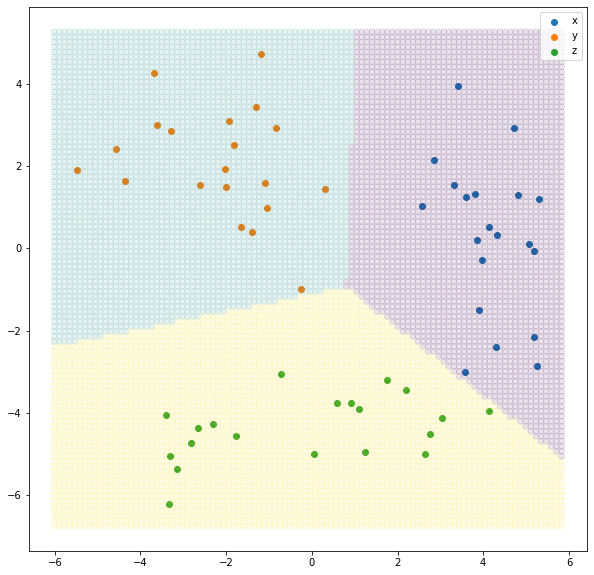

In [4]:
fig, ax = plt.subplots(figsize = (10,10))

for v in l:
    ax.scatter(P[v][0],P[v][1], label = v)
    
x = np.linspace(*ax.get_xlim(), num = 100)
y = np.linspace(*ax.get_ylim(), num = 100)

@np.vectorize
def classify(px, py):
    p = np.array([px,py]).reshape(-1,1)
    idx = np.argmax([p.T @ a[v].value + b[v].value for v in l])
    return idx
        
xx , yy = np.meshgrid(x,y)
ax.scatter(xx,yy, c = classify(xx,yy), alpha = 0.1)

plt.legend()
plt.show()